In [3]:
# import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load data from CSV file
csv_file_path = './database/audiometric_test_database.csv'  # Update this with your actual CSV file path
df = pd.read_csv(csv_file_path)

In [5]:
# Ensure that the necessary columns exist
required_columns = ['Gender_(M=1/F=0)','Age_In_Years','045dB_20','045dB_30','045dB_40','045dB_50','045dB_12k','045dB_12.5K','045dB_13K','045dB_13.5K','045dB_14K','045dB_14.5K','045dB_15K','045dB_15.5K','045dB_16K','045dB_16.5K','045dB_17K','045dB_17.5K','045dB_18K','040dB_20','040dB_30','040dB_40','040dB_50','040dB_12k','040dB_12.5K','040dB_13K','040dB_13.5K','040dB_14K','040dB_14.5K','040dB_15K','040dB_15.5K','040dB_16K','040dB_16.5K','040dB_17K','040dB_17.5K','040dB_18K','035dB_20','035dB_30','035dB_40','035dB_50','035dB_12k','035dB_12.5K','035dB_13K','035dB_13.5K','035dB_14K','035dB_14.5K','035dB_15K','035dB_15.5K','035dB_16K','035dB_16.5K','035dB_17K','035dB_17.5K','035dB_18K','hearing_age']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"CSV file must contain the following columns: {required_columns}")

In [6]:
# Features and target
X = df[['Gender_(M=1/F=0)','Age_In_Years','045dB_20','045dB_30','045dB_40','045dB_50','045dB_12k','045dB_12.5K','045dB_13K','045dB_13.5K','045dB_14K','045dB_14.5K','045dB_15K','045dB_15.5K','045dB_16K','045dB_16.5K','045dB_17K','045dB_17.5K','045dB_18K','040dB_20','040dB_30','040dB_40','040dB_50','040dB_12k','040dB_12.5K','040dB_13K','040dB_13.5K','040dB_14K','040dB_14.5K','040dB_15K','040dB_15.5K','040dB_16K','040dB_16.5K','040dB_17K','040dB_17.5K','040dB_18K','035dB_20','035dB_30','035dB_40','035dB_50','035dB_12k','035dB_12.5K','035dB_13K','035dB_13.5K','035dB_14K','035dB_14.5K','035dB_15K','035dB_15.5K','035dB_16K','035dB_16.5K','035dB_17K','035dB_17.5K','035dB_18K']]
y = df['hearing_age']

In [7]:
# Preprocessing
# Specify categorical and numerical features
categorical_features = ['Gender_(M=1/F=0)', '045dB_20','045dB_30','045dB_40','045dB_50','045dB_12k','045dB_12.5K','045dB_13K','045dB_13.5K','045dB_14K','045dB_14.5K','045dB_15K','045dB_15.5K','045dB_16K','045dB_16.5K','045dB_17K','045dB_17.5K','045dB_18K','040dB_20','040dB_30','040dB_40','040dB_50','040dB_12k','040dB_12.5K','040dB_13K','040dB_13.5K','040dB_14K','040dB_14.5K','040dB_15K','040dB_15.5K','040dB_16K','040dB_16.5K','040dB_17K','040dB_17.5K','040dB_18K','035dB_20','035dB_30','035dB_40','035dB_50','035dB_12k','035dB_12.5K','035dB_13K','035dB_13.5K','035dB_14K','035dB_14.5K','035dB_15K','035dB_15.5K','035dB_16K','035dB_16.5K','035dB_17K','035dB_17.5K','035dB_18K']
numerical_features = ['Age_In_Years']

In [8]:
# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [9]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror'))
])

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_In_Years']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender_(M=1/F=0)',
                                                   '045dB_20', '045dB_30',
                                                   '045dB_40', '045dB_50',
                                                   '045dB_12k', '045dB_12.5K',
                                                   '045dB_13K', '045dB_13.5K',
                                                   '045dB_14K', '045dB_14.5K',
                                                   '045dB_15K', '045dB_15.5K',
                                                   '045dB_16K', '045dB_16.5K',
                                                   '045dB_17K', '045dB_17.5K',
                                                   '...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [12]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 22.29
R² Score: 0.88


Mean Squared Error (MSE): 22.29: This value indicates the average squared difference between the predicted and actual hearing ages. While it's a numerical value, whether it's considered "good" depends on the specific context of your dataset and the range of the target variable.

R² Score: 0.88: An R² score of 0.88 suggests that your model explains 88% of the variance in the hearing age. This is quite good, as it indicates that your model has captured a substantial amount of the underlying patterns in the data.

Why R² is Used for Percentage Accuracy:
R² indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
If R² = 0.88, this means that 88% of the variance in the data is explained by the model. Hence, we can interpret this as the model being 88% accurate.
Limitations:
R² is generally preferred for linear regression tasks, but for complex or non-linear models, it might not always give a clear sense of "accuracy" in the traditional sense (especially if the target variable has high variability).
For classification models, accuracy is easier to define as a percentage of correctly classified instances, but in regression, R² is the most intuitive metric for percentage-based accuracy.

In [15]:
import joblib
# Save the model to a file
# Access the XGBoost model and save it
model = pipeline.named_steps['model']
model.save_model('trained_model.json')  # Save as XGBoost model

# Alternatively, save the entire pipeline using joblib
joblib.dump(pipeline, 'trained_pipeline_v2.pkl')

['trained_pipeline_v2.pkl']

In [16]:
import pandas as pd

# Adjust this to match the expected number of features (52 in this case)
single_entry = pd.DataFrame([[1,16,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0]], 
                  columns=['Gender_(M=1/F=0)', 'Age_In_Years', '045dB_20', '045dB_30', '045dB_40', '045dB_50', '045dB_12k', '045dB_12.5K', '045dB_13K', '045dB_13.5K', '045dB_14K', 
                           '045dB_14.5K', '045dB_15K', '045dB_15.5K', '045dB_16K', '045dB_16.5K', '045dB_17K', '045dB_17.5K', '045dB_18K', 
                           '040dB_20', '040dB_30', '040dB_40', '040dB_50', '040dB_12k', '040dB_12.5K', '040dB_13K', '040dB_13.5K', 
                           '040dB_14K', '040dB_14.5K', '040dB_15K', '040dB_15.5K', '040dB_16K', '040dB_16.5K', '040dB_17K', 
                           '040dB_17.5K', '040dB_18K', '035dB_20', '035dB_30', '035dB_40', '035dB_50', '035dB_12k', 
                           '035dB_12.5K', '035dB_13K', '035dB_13.5K', '035dB_14K', '035dB_14.5K', '035dB_15K', 
                           '035dB_15.5K', '035dB_16K', '035dB_16.5K', '035dB_17K', '035dB_17.5K', '035dB_18K'])

# Make a prediction
prediction = pipeline.predict(single_entry)

# Output the result
print(f'Predicted class: {prediction[0]}')

Predicted class: 16.000558853149414


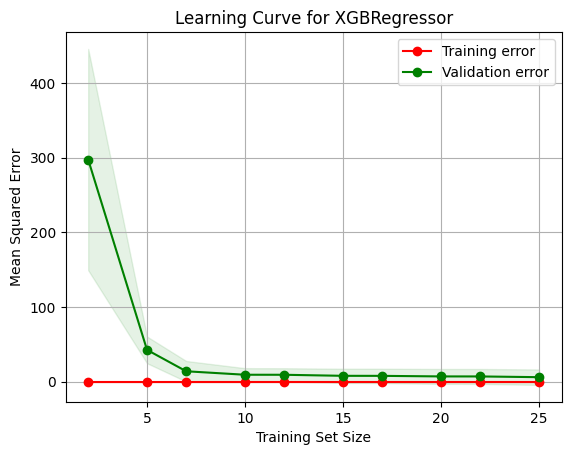

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, scoring='neg_mean_squared_error', cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),  # 10 steps from 10% to 100% of the training set
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation error")
    
    # Fill between standard deviation intervals
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    
    # Labels and title
    plt.title("Learning Curve for XGBRegressor")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# Plot the learning curve
plot_learning_curve(model, X_train, y_train, scoring='neg_mean_squared_error')

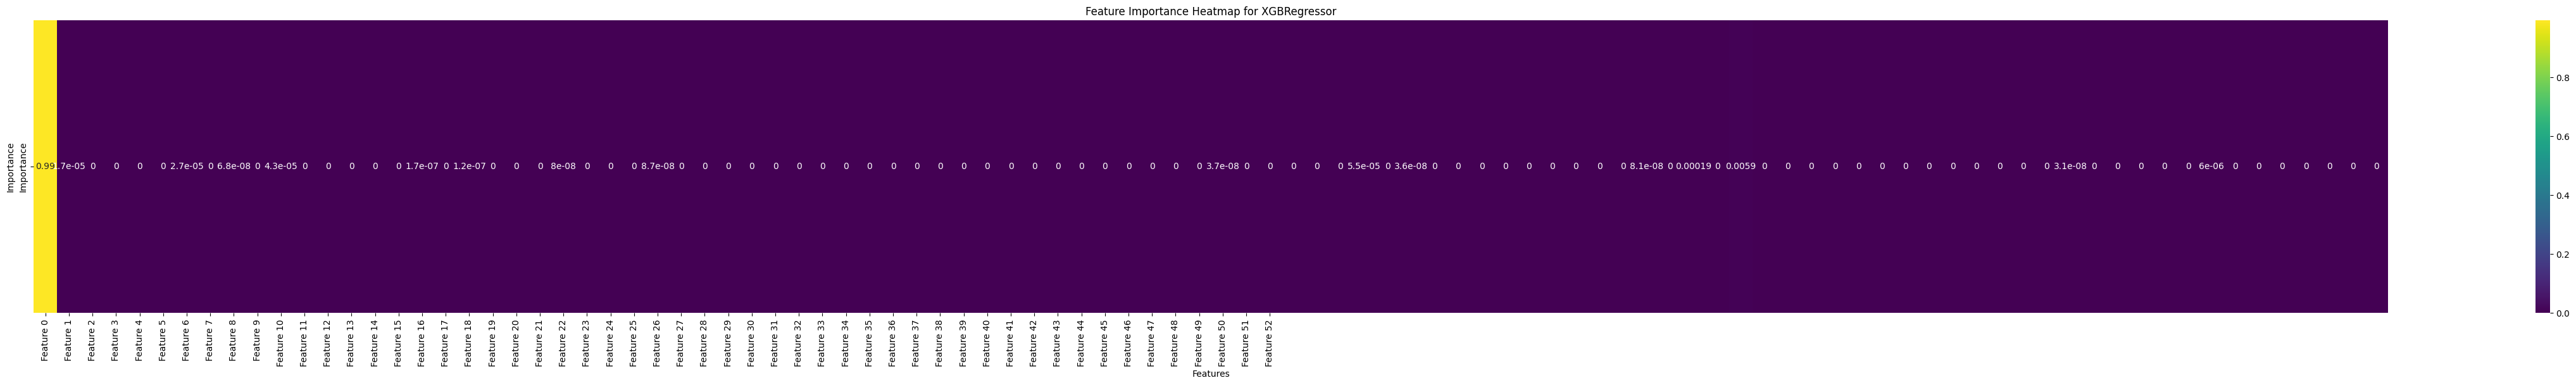

In [21]:
import seaborn as sns

# Feature names for visualization (can be actual column names if working with real data)
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a heatmap using seaborn
plt.figure(figsize=(60, 6))
sns.heatmap([feature_importance], annot=True, cmap='viridis', cbar=True, xticklabels=feature_names, yticklabels=['Importance'])

# Add title and labels
plt.title('Feature Importance Heatmap for XGBRegressor')
plt.xlabel('Features')
plt.ylabel('Importance')

# Show the plot
plt.show()

In [22]:
# Calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

ValueError: Feature shape mismatch, expected: 100, got 53

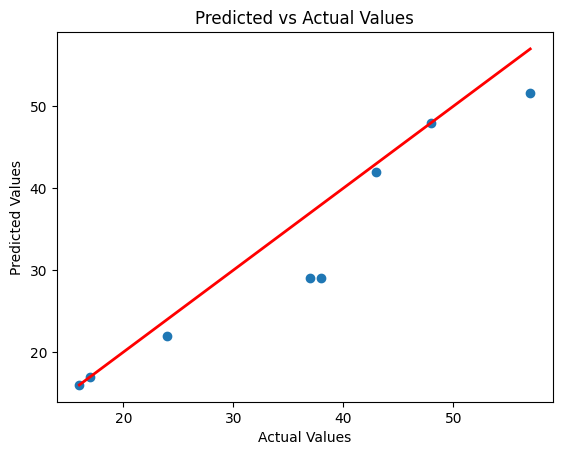

In [23]:
# Predicted vs Actual Plot

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [25]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

ValueError: Feature shape mismatch, expected: 100, got 53

In [26]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(model, X_train, [0], grid_resolution=50)  # Feature 0 (change as needed)
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/home/kalyan/.local/lib/python3.8/site-packages/sklearn/inspection/__init__.py)

In [28]:
import shap # type: ignore

# Create a SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/shap/shap/issues/580.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


ValueError: Feature shape mismatch, expected: 100, got 53